In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification, AutoModel 
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tqdm import trange
import random

In [3]:
model = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/TCC II/30K-4-epochs-neuralmind-bert-base-portuguese-cased/model",local_files_only=True)


OSError: ignored

In [ ]:
tokenizer = BertTokenizer.from_pretrained(
    'neuralmind/bert-base-portuguese-cased',
    do_lower_case = True
    )

In [ ]:
all_posts_df_tests = pd.read_csv('/content/drive/MyDrive/TCC II/all_30k_to_test_posts.csv')
all_posts_df_tests

In [ ]:
text = all_posts_df_tests.pre_processed_message.values
labels = all_posts_df_tests.label.values

In [ ]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 32,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )


for sample in text:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id.append(encoding_dict['input_ids']) 
  attention_masks.append(encoding_dict['attention_mask'])


token_id = torch.cat(token_id, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
batch_size = 16


test_idx = list(range(len(labels)))

test_set = TensorDataset(token_id[test_idx], 
                        attention_masks[test_idx], 
                        labels[test_idx])

test_dataloader = DataLoader(
            test_set,
            sampler = SequentialSampler(test_set),
            batch_size = batch_size
        )

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 5e-5,
                              eps = 1e-08
                              )


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
new_sentence = 'bozo'

test_ids = []
test_attention_mask = []

encoding = preprocessing(new_sentence, tokenizer)

test_ids.append(encoding['input_ids'])
test_attention_mask.append(encoding['attention_mask'])
test_ids = torch.cat(test_ids, dim = 0)
test_attention_mask = torch.cat(test_attention_mask, dim = 0)

with torch.no_grad():
  output = model(test_ids.to(device), token_type_ids = None, attention_mask = test_attention_mask.to(device))

prediction = 'Direita' if np.argmax(output.logits.cpu().numpy()).flatten().item() == 1 else 'Esquerda'


print('Input Sentence: ', new_sentence)
print('Predicted Class: ', prediction)

Input Sentence:  bozo
Predicted Class:  Esquerda


In [ ]:
print(labels.size())
print(labels)

torch.Size([37678])
tensor([0, 0, 0,  ..., 1, 1, 1])


In [ ]:
index = 0
predictions = []

for sample in text:
  test_ids = []
  test_attention_mask = []

  encoding = preprocessing(sample, tokenizer)

  test_ids.append(encoding['input_ids'])
  test_attention_mask.append(encoding['attention_mask'])
  test_ids = torch.cat(test_ids, dim = 0)
  test_attention_mask = torch.cat(test_attention_mask, dim = 0)

  with torch.no_grad():
    output = model(test_ids.to(device), token_type_ids = None, attention_mask = test_attention_mask.to(device))
  index = index + 1
  prediction = np.argmax(output.logits.cpu().numpy()).flatten().item()
  print(index)
  predictions.append(prediction)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


A saída de streaming foi truncada nas últimas 5000 linhas.
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
32724
32725
32726
32727
32728
32729
32730
32731
32732
32733
32734
32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
32753
32754
32755
32756
32757
32758
32759
32760
32761
32762
32763
32764
32765
32766
32767
32768
32769
32770
32771
32772
32773
32774
32775
32776
32777
32778
32779
32780
32781
32782
32783
32784
32785
32786
32787
32788
32789
32790
32791
32792
32793
32794
32795
32796
32797
32798
32799
32800
32801
32802
32803
32804
32805
32806
32807
32808
32809
32810
32811
32812
32813
32814
32815
32816
32817
32818
32819
32820
32821
32822
32823
32824
32825
32826
32827
32828
32829
32830
32831
32832
32833
32834
32835

In [ ]:
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [ ]:
def b_tp(preds, labels):
  return sum([preds == labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
  return sum([preds != labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
  return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
  return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
  tp = b_tp(preds, labels)
  tn = b_tn(preds, labels)
  fp = b_fp(preds, labels)
  fn = b_fn(preds, labels)
  b_accuracy = (tp + tn) / len(labels)
  b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
  b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
  b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
  return b_accuracy, b_precision, b_recall, b_specificity

In [ ]:
test_accuracy, test_precision, test_recall, test_specificity = b_metrics(predictions, labels)

In [ ]:
print(len(predictions),len(labels))

37678 37678


In [ ]:
print('accuracy:',test_accuracy,'\nprecision:', test_precision, '\nrecall',test_recall, '\nspecificity', test_specificity)

accuracy: tensor(0.8247) 
precision: tensor(0.5273) 
recall tensor(0.8991) 
specificity tensor(0.8069)


In [ ]:
right_hit = b_tp(predictions,labels)
right_error = b_fp(predictions,labels)
left_hit = b_fp(predictions,labels)
left_error = b_fn(predictions,labels)

In [ ]:
print('acertos direita:',right_hit)
print('errors direita:',right_error)
print('acertos esquerda:',left_hit)
print('errors esquerta:',left_error)

acertos direita: tensor(6549)
errors direita: tensor(5870)
acertos esquerda: tensor(24524)
errors esquerta: tensor(735)


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
confusion_matrix = metrics.confusion_matrix(labels, predictions)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Esquerda', 'Direita'])

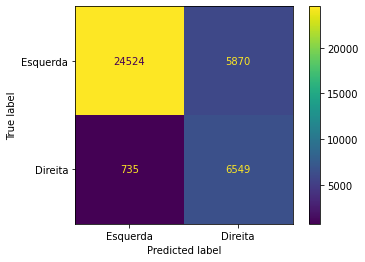

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
all_posts_df_tests['Prediction'] = predictions

In [ ]:
all_posts_df_tests

,Unnamed: 0,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction
0,1089,2018-08-23T00:01:17+0000,371913239843447_298917103995080,agora pouco metro carioca rj ato pro lula,agora pouco no metro carioca rj ato pro lula,356,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,576,1,5,0,3,91,True,left_all_posts,0,0
1,18837,2020-12-29T22:45:46+0000,167637636622585_4192982547421387,agencias reguladoras europa receberam algumas ...,as agencias reguladoras da europa so receberam...,67,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,75,2,5,5,31,0,True,left_all_posts,0,0
2,18299,2020-09-23T12:00:36+0000,167637636622585_3901277689925209,cientistas observaram taxas altas varios probl...,os cientistas observaram taxas mais altas de v...,41,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,129,5,2,1,1,0,True,left_all_posts,0,0
3,37023,2019-06-07T13:07:42+0000,219188754789679_686751311756073,cultura palavra resistencia programa democraci...,cultura palavra e resistencia - o programa dem...,8,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,30,1,1,0,0,4,True,left_all_posts,0,0
4,37137,2019-06-18T16:31:57+0000,219188754789679_2309784529084665,jogo sujo whatsapp eleicao bolsonaro deveria s...,jogo sujo pelo whatsapp : a eleicao de bolsona...,617,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,467,2,6,2,5,52,True,left_all_posts,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,45370,2018-09-13T02:43:36+0000,1911779855707714_2276095159276180,vamos fazer video bombar compartilhe maximo puder,vamos fazer esse video bombar ! ! ! compartilh...,4,mobile_status_update,None,38,0,0,0,0,5,True,right_all_posts,1,1
37674,3069,2019-09-30T01:27:32+0000,890711084350263_2557582667663088,show asneiras culminando causa bolsonaro pesso...,um show de asneiras culminando com `` e por ca...,26,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,49,31,3,3,50,0,True,right_all_posts,1,1
37675,46011,2018-11-17T22:30:27+0000,1911779855707714_2324827824402913,assim caso,se nao for assim eu nem caso .,70,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,45,8,1,0,0,6,True,right_all_posts,1,1
37676,23548,2020-10-16T18:15:32+0000,433157527015872_1618876418443971,hang pega leve,hang nao pega leve,262,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,2029,200,4,0,3,125,True,right_all_posts,1,1


In [ ]:
all_posts_df_tests['hit'] = all_posts_df_tests['Prediction'].eq(all_posts_df_tests['label'])

In [ ]:
all_posts_df_tests

,Unnamed: 0,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
0,1089,2018-08-23T00:01:17+0000,371913239843447_298917103995080,agora pouco metro carioca rj ato pro lula,agora pouco no metro carioca rj ato pro lula,356,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,576,1,5,0,3,91,True,left_all_posts,0,0,True
1,18837,2020-12-29T22:45:46+0000,167637636622585_4192982547421387,agencias reguladoras europa receberam algumas ...,as agencias reguladoras da europa so receberam...,67,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,75,2,5,5,31,0,True,left_all_posts,0,0,True
2,18299,2020-09-23T12:00:36+0000,167637636622585_3901277689925209,cientistas observaram taxas altas varios probl...,os cientistas observaram taxas mais altas de v...,41,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,129,5,2,1,1,0,True,left_all_posts,0,0,True
3,37023,2019-06-07T13:07:42+0000,219188754789679_686751311756073,cultura palavra resistencia programa democraci...,cultura palavra e resistencia - o programa dem...,8,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,30,1,1,0,0,4,True,left_all_posts,0,0,True
4,37137,2019-06-18T16:31:57+0000,219188754789679_2309784529084665,jogo sujo whatsapp eleicao bolsonaro deveria s...,jogo sujo pelo whatsapp : a eleicao de bolsona...,617,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,467,2,6,2,5,52,True,left_all_posts,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,45370,2018-09-13T02:43:36+0000,1911779855707714_2276095159276180,vamos fazer video bombar compartilhe maximo puder,vamos fazer esse video bombar ! ! ! compartilh...,4,mobile_status_update,None,38,0,0,0,0,5,True,right_all_posts,1,1,True
37674,3069,2019-09-30T01:27:32+0000,890711084350263_2557582667663088,show asneiras culminando causa bolsonaro pesso...,um show de asneiras culminando com `` e por ca...,26,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,49,31,3,3,50,0,True,right_all_posts,1,1,True
37675,46011,2018-11-17T22:30:27+0000,1911779855707714_2324827824402913,assim caso,se nao for assim eu nem caso .,70,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,45,8,1,0,0,6,True,right_all_posts,1,1,True
37676,23548,2020-10-16T18:15:32+0000,433157527015872_1618876418443971,hang pega leve,hang nao pega leve,262,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,2029,200,4,0,3,125,True,right_all_posts,1,1,True


In [ ]:
all_posts = pd.read_csv('/content/drive/MyDrive/TCC II/30K-4-epochs-neuralmind-bert-base-portuguese-cased/results/all_posts_df_tests_with_results.csv')

In [ ]:
all_posts

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
0,0,1089,2018-08-23T00:01:17+0000,371913239843447_298917103995080,agora pouco metro carioca rj ato pro lula,agora pouco no metro carioca rj ato pro lula,356,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,576,1,5,0,3,91,True,left_all_posts,0,0,True
1,1,18837,2020-12-29T22:45:46+0000,167637636622585_4192982547421387,agencias reguladoras europa receberam algumas ...,as agencias reguladoras da europa so receberam...,67,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,75,2,5,5,31,0,True,left_all_posts,0,0,True
2,2,18299,2020-09-23T12:00:36+0000,167637636622585_3901277689925209,cientistas observaram taxas altas varios probl...,os cientistas observaram taxas mais altas de v...,41,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,129,5,2,1,1,0,True,left_all_posts,0,0,True
3,3,37023,2019-06-07T13:07:42+0000,219188754789679_686751311756073,cultura palavra resistencia programa democraci...,cultura palavra e resistencia - o programa dem...,8,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,30,1,1,0,0,4,True,left_all_posts,0,0,True
4,4,37137,2019-06-18T16:31:57+0000,219188754789679_2309784529084665,jogo sujo whatsapp eleicao bolsonaro deveria s...,jogo sujo pelo whatsapp : a eleicao de bolsona...,617,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,467,2,6,2,5,52,True,left_all_posts,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,37673,45370,2018-09-13T02:43:36+0000,1911779855707714_2276095159276180,vamos fazer video bombar compartilhe maximo puder,vamos fazer esse video bombar ! ! ! compartilh...,4,mobile_status_update,None,38,0,0,0,0,5,True,right_all_posts,1,1,True
37674,37674,3069,2019-09-30T01:27:32+0000,890711084350263_2557582667663088,show asneiras culminando causa bolsonaro pesso...,um show de asneiras culminando com `` e por ca...,26,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,49,31,3,3,50,0,True,right_all_posts,1,1,True
37675,37675,46011,2018-11-17T22:30:27+0000,1911779855707714_2324827824402913,assim caso,se nao for assim eu nem caso .,70,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,45,8,1,0,0,6,True,right_all_posts,1,1,True
37676,37676,23548,2020-10-16T18:15:32+0000,433157527015872_1618876418443971,hang pega leve,hang nao pega leve,262,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,2029,200,4,0,3,125,True,right_all_posts,1,1,True


In [ ]:
labels = all_posts['label']
predictions = all_posts['Prediction']

In [ ]:
labels_right = all_posts[all_posts["label"] == 1]
labels_right 

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
30394,30394,42811,2018-11-06T23:22:04+0000,1392558690986399_2175103122731948,vamos comecar mudar brasil raiz educacao assin...,vamos comecar a mudar o brasil por sua raiz a ...,32,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,189,7,0,0,0,17,True,right_all_posts,1,1,True
30395,30395,20787,2019-04-01T16:03:11+0000,433157527015872_946336202364666,salomao pediu deus sabedoria jair bolsonaro pe...,- `` salomao pediu a deus sabedoria ... '' - j...,379,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1353,0,4,0,1,106,True,right_all_posts,1,1,True
30396,30396,4969,2021-05-24T16:02:19+0000,890711084350263_4130647567023249,brasil devera ter moeda digital emitida banco ...,brasil devera ter moeda digital emitida pelo b...,0,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,13,0,1,0,0,0,True,right_all_posts,1,1,True
30397,30397,35864,2021-10-17T17:09:54+0000,1965770023473808_4655479594502824,laura anos,- laura 11 anos ....,1706,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,26498,22,12,2,8,3800,True,right_all_posts,1,1,True
30398,30398,31614,2018-10-15T12:00:01+0000,1965770023473808_557688184668153,forapt,# forapt,384,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,183,1,3,77,18,0,True,right_all_posts,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,37673,45370,2018-09-13T02:43:36+0000,1911779855707714_2276095159276180,vamos fazer video bombar compartilhe maximo puder,vamos fazer esse video bombar ! ! ! compartilh...,4,mobile_status_update,None,38,0,0,0,0,5,True,right_all_posts,1,1,True
37674,37674,3069,2019-09-30T01:27:32+0000,890711084350263_2557582667663088,show asneiras culminando causa bolsonaro pesso...,um show de asneiras culminando com `` e por ca...,26,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,49,31,3,3,50,0,True,right_all_posts,1,1,True
37675,37675,46011,2018-11-17T22:30:27+0000,1911779855707714_2324827824402913,assim caso,se nao for assim eu nem caso .,70,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,45,8,1,0,0,6,True,right_all_posts,1,1,True
37676,37676,23548,2020-10-16T18:15:32+0000,433157527015872_1618876418443971,hang pega leve,hang nao pega leve,262,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,2029,200,4,0,3,125,True,right_all_posts,1,1,True


In [ ]:
labels_left = all_posts[all_posts["label"] == 0]
labels_left

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
0,0,1089,2018-08-23T00:01:17+0000,371913239843447_298917103995080,agora pouco metro carioca rj ato pro lula,agora pouco no metro carioca rj ato pro lula,356,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,576,1,5,0,3,91,True,left_all_posts,0,0,True
1,1,18837,2020-12-29T22:45:46+0000,167637636622585_4192982547421387,agencias reguladoras europa receberam algumas ...,as agencias reguladoras da europa so receberam...,67,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,75,2,5,5,31,0,True,left_all_posts,0,0,True
2,2,18299,2020-09-23T12:00:36+0000,167637636622585_3901277689925209,cientistas observaram taxas altas varios probl...,os cientistas observaram taxas mais altas de v...,41,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,129,5,2,1,1,0,True,left_all_posts,0,0,True
3,3,37023,2019-06-07T13:07:42+0000,219188754789679_686751311756073,cultura palavra resistencia programa democraci...,cultura palavra e resistencia - o programa dem...,8,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,30,1,1,0,0,4,True,left_all_posts,0,0,True
4,4,37137,2019-06-18T16:31:57+0000,219188754789679_2309784529084665,jogo sujo whatsapp eleicao bolsonaro deveria s...,jogo sujo pelo whatsapp : a eleicao de bolsona...,617,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,467,2,6,2,5,52,True,left_all_posts,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,30389,73285,2020-05-15T15:24:42+0000,654339308067228_1643349062499576,numeros pandemia brasil permanece perspectiva ...,numeros da pandemia | o brasil permanece com u...,5,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,8,0,0,1,0,1,True,left_all_posts,0,0,True
30390,30390,2147,2019-05-18T00:57:41+0000,371913239843447_854937958207637,presidente jair boslonaro compartilhou grupo w...,o presidente jair boslonaro compartilhou em um...,133,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,164,67,4,4,20,4,True,left_all_posts,0,0,True
30391,30391,24328,2020-03-10T15:48:47+0000,292074710916413_863247390787068,autogolpe jair bolsonaro motim policiais milit...,o autogolpe de jair bolsonaro e o motim dos po...,28,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,142,0,0,0,0,12,True,left_all_posts,0,0,True
30392,30392,25678,2020-12-11T15:16:00+0000,292074710916413_2320480891409108,lafa,por lafa,468,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,432,17,4,91,67,2,True,left_all_posts,0,0,True


In [ ]:
labels_left_hit = all_posts[(all_posts['label'] == 0) & (all_posts['Prediction'] == 0 )]
labels_left_hit

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
0,0,1089,2018-08-23T00:01:17+0000,371913239843447_298917103995080,agora pouco metro carioca rj ato pro lula,agora pouco no metro carioca rj ato pro lula,356,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,576,1,5,0,3,91,True,left_all_posts,0,0,True
1,1,18837,2020-12-29T22:45:46+0000,167637636622585_4192982547421387,agencias reguladoras europa receberam algumas ...,as agencias reguladoras da europa so receberam...,67,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,75,2,5,5,31,0,True,left_all_posts,0,0,True
2,2,18299,2020-09-23T12:00:36+0000,167637636622585_3901277689925209,cientistas observaram taxas altas varios probl...,os cientistas observaram taxas mais altas de v...,41,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,129,5,2,1,1,0,True,left_all_posts,0,0,True
3,3,37023,2019-06-07T13:07:42+0000,219188754789679_686751311756073,cultura palavra resistencia programa democraci...,cultura palavra e resistencia - o programa dem...,8,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,30,1,1,0,0,4,True,left_all_posts,0,0,True
4,4,37137,2019-06-18T16:31:57+0000,219188754789679_2309784529084665,jogo sujo whatsapp eleicao bolsonaro deveria s...,jogo sujo pelo whatsapp : a eleicao de bolsona...,617,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,467,2,6,2,5,52,True,left_all_posts,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30389,30389,73285,2020-05-15T15:24:42+0000,654339308067228_1643349062499576,numeros pandemia brasil permanece perspectiva ...,numeros da pandemia | o brasil permanece com u...,5,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,8,0,0,1,0,1,True,left_all_posts,0,0,True
30390,30390,2147,2019-05-18T00:57:41+0000,371913239843447_854937958207637,presidente jair boslonaro compartilhou grupo w...,o presidente jair boslonaro compartilhou em um...,133,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,164,67,4,4,20,4,True,left_all_posts,0,0,True
30391,30391,24328,2020-03-10T15:48:47+0000,292074710916413_863247390787068,autogolpe jair bolsonaro motim policiais milit...,o autogolpe de jair bolsonaro e o motim dos po...,28,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.5...,142,0,0,0,0,12,True,left_all_posts,0,0,True
30392,30392,25678,2020-12-11T15:16:00+0000,292074710916413_2320480891409108,lafa,por lafa,468,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,432,17,4,91,67,2,True,left_all_posts,0,0,True


In [ ]:
labels_left_error = all_posts[(all_posts['label'] == 0) & (all_posts['Prediction'] == 1 )]
labels_left_error

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
17,17,73290,2020-05-15T02:40:16+0000,654339308067228_1642886492545833,nesta sexta,nesta sexta !,30,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,79,0,0,0,0,5,True,left_all_posts,0,1,False
23,23,9427,2019-09-20T22:42:45+0000,1441803576032791_2455145728031899,agradando amigos militares,agradando os amigos militares .,21,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,14,0,2,0,14,0,True,left_all_posts,0,1,False
29,29,43416,2019-04-29T18:57:38+0000,165205036869225_2531793626877009,contra aborto,quem e contra o aborto ?,8330,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,14219,234,68,3142,174,639,True,left_all_posts,0,1,False
32,32,870,2018-06-12T13:27:54+0000,371913239843447_622618264772942,rede globo mato grosso tv morena colocou camis...,a rede globo do mato grosso tv morena colocou ...,433,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,347,9,42,16,138,0,True,left_all_posts,0,1,False
33,33,63585,2018-08-27T18:39:01+0000,127835925882_10156544435835883,decisao negar pedido liminar coligacao expresi...,decisao de negar pedido liminar da coligacao d...,19,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,35,0,0,3,5,0,True,left_all_posts,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30367,30367,13762,2021-10-16T14:43:04+0000,1441803576032791_3133241633555635,pois,pois e,6,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,5,0,0,0,0,0,True,left_all_posts,0,1,False
30370,30370,43541,2019-05-24T17:15:48+0000,165205036869225_2581397928583245,combater violencia contra lgbts dizer existe q...,nos temos que combater a violencia contra os l...,9987,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,6845,121,1278,11,22,1723,True,left_all_posts,0,1,False
30379,30379,51644,2020-02-24T20:40:18+0000,135536083145232_3130574460308031,helio correu defesa bolsonaro parar reinventar...,helio correu em defesa de bolsonaro : temos qu...,71,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,92,32,5,10,208,2,True,left_all_posts,0,1,False
30384,30384,24968,2020-06-26T13:30:51+0000,292074710916413_1879842902139578,vamos falar odio eleitores bolsonaro defesa de...,vamos falar sobre o odio sobre os eleitores de...,5,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,41,1,0,0,0,1,True,left_all_posts,0,1,False


In [ ]:
labels_right_hit = all_posts[(all_posts['label'] == 1) & (all_posts['Prediction'] == 1 )]
labels_right_hit

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
30394,30394,42811,2018-11-06T23:22:04+0000,1392558690986399_2175103122731948,vamos comecar mudar brasil raiz educacao assin...,vamos comecar a mudar o brasil por sua raiz a ...,32,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,189,7,0,0,0,17,True,right_all_posts,1,1,True
30395,30395,20787,2019-04-01T16:03:11+0000,433157527015872_946336202364666,salomao pediu deus sabedoria jair bolsonaro pe...,- `` salomao pediu a deus sabedoria ... '' - j...,379,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,1353,0,4,0,1,106,True,right_all_posts,1,1,True
30396,30396,4969,2021-05-24T16:02:19+0000,890711084350263_4130647567023249,brasil devera ter moeda digital emitida banco ...,brasil devera ter moeda digital emitida pelo b...,0,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,13,0,1,0,0,0,True,right_all_posts,1,1,True
30397,30397,35864,2021-10-17T17:09:54+0000,1965770023473808_4655479594502824,laura anos,- laura 11 anos ....,1706,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,26498,22,12,2,8,3800,True,right_all_posts,1,1,True
30398,30398,31614,2018-10-15T12:00:01+0000,1965770023473808_557688184668153,forapt,# forapt,384,added_video,https://scontent.fplu2-1.fna.fbcdn.net/v/t15.1...,183,1,3,77,18,0,True,right_all_posts,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37673,37673,45370,2018-09-13T02:43:36+0000,1911779855707714_2276095159276180,vamos fazer video bombar compartilhe maximo puder,vamos fazer esse video bombar ! ! ! compartilh...,4,mobile_status_update,None,38,0,0,0,0,5,True,right_all_posts,1,1,True
37674,37674,3069,2019-09-30T01:27:32+0000,890711084350263_2557582667663088,show asneiras culminando causa bolsonaro pesso...,um show de asneiras culminando com `` e por ca...,26,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,49,31,3,3,50,0,True,right_all_posts,1,1,True
37675,37675,46011,2018-11-17T22:30:27+0000,1911779855707714_2324827824402913,assim caso,se nao for assim eu nem caso .,70,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,45,8,1,0,0,6,True,right_all_posts,1,1,True
37676,37676,23548,2020-10-16T18:15:32+0000,433157527015872_1618876418443971,hang pega leve,hang nao pega leve,262,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,2029,200,4,0,3,125,True,right_all_posts,1,1,True


In [ ]:
labels_right_error = all_posts[(all_posts['label'] == 1) & (all_posts['Prediction'] == 0 )]
labels_right_error

,Unnamed: 0,Unnamed: 0.1,created_time,id,pre_processed_message,message_min_processed,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,author,label,Prediction,hit
30404,30404,44202,2020-06-03T17:11:01+0000,1392558690986399_2597817390460517,coisa ne oms anunciou retomara testes hidroxic...,que coisa ne ? ? ? a oms anunciou que retomara...,279,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,330,80,5,1,5,7,True,right_all_posts,1,0,False
30408,30408,17830,2021-08-24T21:25:14+0000,448529311980229_1943502215816257,primeira noite lula natal ginga tapioca bode a...,primeira noite de lula em natal teve ginga com...,0,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,4,8,0,0,1,0,True,right_all_posts,1,0,False
30423,30423,43612,2019-08-23T17:18:00+0000,1392558690986399_2359544497621142,vamos falar bondade europeia bastou roubarem m...,vamos falar sobre a bondade europeia . ja nao ...,591,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,987,12,3,5,4,23,True,right_all_posts,1,0,False
30428,30428,9158,2019-06-28T18:06:30+0000,550142935316937_938551879809372,segundo maior acordo assinado comunidade europ...,este e o segundo maior acordo ja assinado pela...,417,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,736,2,7,0,0,71,True,right_all_posts,1,0,False
30437,30437,7548,2018-12-10T16:36:58+0000,550142935316937_797160170615211,governo afasta policiais participaram operacao...,governo afasta 12 policiais que participaram d...,5,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,8,0,0,4,0,0,True,right_all_posts,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37572,37572,1511,2018-12-21T06:01:21+0000,890711084350263_2082161645205195,jogo cartas marcadas politicos garantem regali...,jogo de cartas marcadas : os politicos garante...,99,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,74,0,1,4,30,0,True,right_all_posts,1,0,False
37593,37593,4991,2021-05-26T21:27:26+0000,890711084350263_4137399843014688,golpe pix saldo conta passou r mil r instantes...,golpe do pix : saldo da conta passou de r $ 65...,13,shared_story,https://external.fplu2-1.fna.fbcdn.net/safe_im...,9,0,2,0,2,0,True,right_all_posts,1,0,False
37624,37624,9975,2020-01-22T22:05:39+0000,550142935316937_1115558135442078,disse enquanto estudando entrar pasta atriz de...,ele disse que por enquanto esta `` estudando '...,309,added_photos,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,2714,1,10,1,0,295,True,right_all_posts,1,0,False
37648,37648,45796,2018-10-21T02:18:24+0000,1911779855707714_2297969547088741,exercito tias maes vovos vai derrotar exercito...,nosso exercito de tias maes e vovos vai derrot...,6,mobile_status_update,https://scontent.fplu2-1.fna.fbcdn.net/v/t1.64...,24,1,0,0,0,0,True,right_all_posts,1,0,False
